### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

$n=50$

and

$Pearson(x,y) < -0.9$

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
sns.set()
x = np.array(list(np.arange(0, 49)) + [500])
y = np.array(list(np.arange(0, 49)) + [-500])

<AxesSubplot: xlabel='x', ylabel='y'>

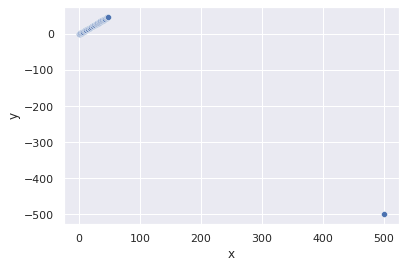

In [2]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
sns.scatterplot(data=df, x="x", y="y")

In [3]:
sp.stats.pearsonr(x, y)

(-0.9227481955657544, 1.6459502633968441e-21)

$n=49$

and

$Pearson(x,y) > 0.9$

In [4]:
x = x[:49]
y = y[:49]

In [5]:
scipy.stats.pearsonr(x, y)

NameError: name 'scipy' is not defined

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

It is impossible for a data set to satisfy the conditions you have described. The Spearman rank correlation coefficient, ρ(x,y), measures the monotonicity of the relationship between two variables. 

If ρ(x,y) = 1, it means that the variables are perfectly monotonically related (either increasing or decreasing) and there is no possibility for any of the n-1 points to have a rank correlation less than 0.9. 

This is because:
- the rank correlation of any subset of the data must also be monotonic
- ?? the rank correlation coefficient of any subset cannot be less than the correlation coefficient of the full data set. ??

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

It is not possible for Kendall rank correlation (τ(x,y)) to be greater than Spearman rank correlation (ρ(x,y)). This is because Kendall rank correlation and Spearman rank correlation are both measures of rank correlation, which means they both measure the relationship between two variables by considering the rankings of the data rather than the actual values.

Spearman rank correlation is a more general measure of rank correlation than Kendall rank correlation because it can handle ties in the data, while Kendall rank correlation cannot. Specifically, Spearman rank correlation is defined as the Pearson correlation between the ranks of the data, while Kendall rank correlation is based on the number of concordant and discordant pairs of observations. Because of this, it is always the case that Spearman rank correlation is greater than or equal to Kendall rank correlation.

Therefore, it is not possible to have a situation where Kendall rank correlation is greater than Spearman rank correlation.

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

??

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
x = np.array(list(np.arange(0, 49)) + [500])
y = np.array(list(np.arange(0, 49)) + [-500])

In [7]:
sp.stats.pearsonr(x, y)

(-0.9227481955657544, 1.6459502633968441e-21)

In [8]:
sp.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8823529411764706, pvalue=2.498897813703167e-17)

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

In [9]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
x = np.array(list(np.arange(0, 49)) + [500])
y = np.array(list(np.arange(0, 49)*-1) + [500])

In [10]:
sp.stats.pearsonr(x, y)

(0.9227481955657544, 1.6459502633968441e-21)

In [11]:
sp.stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.8823529411764706, pvalue=2.498897813703167e-17)

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

In [12]:
x = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1000,10000])
y = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,100,1000,10000])

In [13]:
sp.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.6352234031660235, pvalue=0.0034735594452982247)

In [14]:
sp.stats.kendalltau(x, y)

KendalltauResult(correlation=0.5461186812727501, pvalue=0.004585553992544596)

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [88]:
df = pd.read_csv("heart.csv", delimiter='\t').astype(float)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [89]:
df['sex'] = df['sex'].replace({1.0: 'Male', 0.0: 'Female'})
df['cp'] = df['cp'].astype(object)
df['fbs'] = df['fbs'].replace({1.0: True, 0.0: False}).astype(bool)
df['restecg'] = df['restecg'].astype(object)
df['slope'] = df['slope'].astype(object)
df['ca'] = df['ca'].astype(object)
df['thal'] = df['thal'].astype(object)
df['exang'] = df['exang'].replace({1.0: True, 0.0: False}).astype(bool)
df['target'] = df['target'].replace({1.0: True, 0.0: False}).astype(bool)

num_list = list(df.select_dtypes(include=["float64"]).columns)
cat_list = list(df.select_dtypes(include=["bool"]).columns) + list(df.select_dtypes(include=["object"]).columns)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    object 
 2   cp        298 non-null    object 
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   301 non-null    object 
 7   thalach   299 non-null    float64
 8   exang     303 non-null    bool   
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    bool   
dtypes: bool(3), float64(5), object(6)
memory usage: 27.1+ KB


In [92]:
df[num_list] = df[num_list].fillna(df[num_list].median())
df[cat_list] = df[cat_list].fillna(df[cat_list].mode().T[0].to_dict())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    bool   
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    bool   
dtypes: bool(3), float64(10), object(1)
memory usage: 27.1+ KB


In [94]:
# calculate 95% confidence interval for each numerical feature
for col in df[num_list]:
    group0 = df[df["target"] == 0][col]
    group1 = df[df["target"] == 1][col]
    conf_int_0 = sp.stats.t.interval(0.95, len(group0)-1, loc=group0.mean(), scale=sp.stats.sem(group0))
    conf_int_1 = sp.stats.t.interval(0.95, len(group1)-1, loc=group1.mean(), scale=sp.stats.sem(group1))
    if conf_int_0[0] > conf_int_1[1]:
        print(f"{col} : Mean of healthy population > Mean of disease population")
    elif conf_int_0[1] < conf_int_1[0]:
        print(f"{col} : Mean of healthy population < Mean of disease population")
    else:
        print(f"{col} : Mean of healthy population and disease population overlap")

age : Mean of healthy population > Mean of disease population
trestbps : Mean of healthy population and disease population overlap
chol : Mean of healthy population and disease population overlap
thalach : Mean of healthy population < Mean of disease population
oldpeak : Mean of healthy population > Mean of disease population


/dsp/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/dsp/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


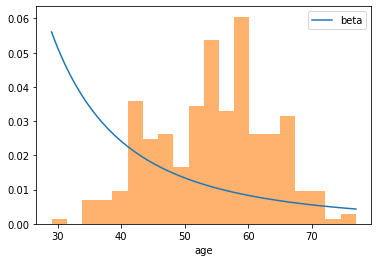

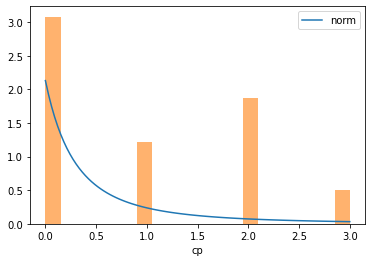

/dsp/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


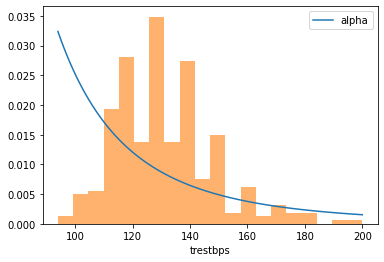

/dsp/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


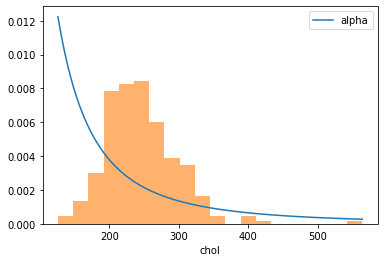

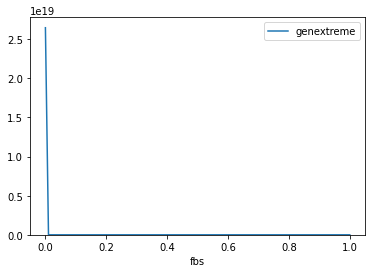

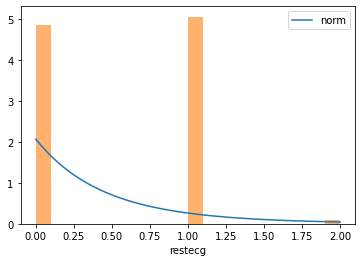

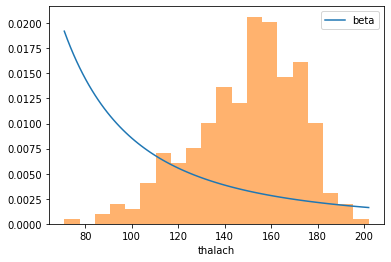

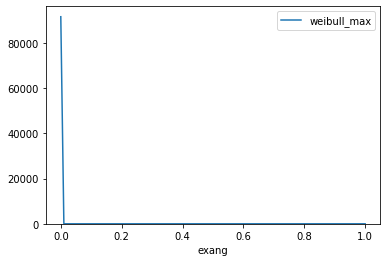

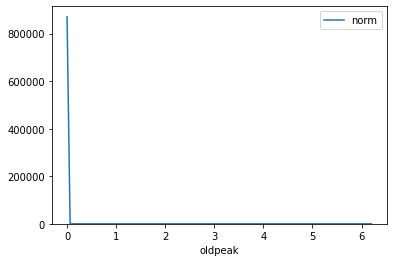

/dsp/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2492: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


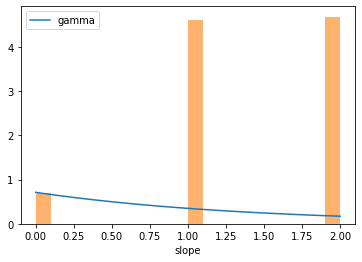

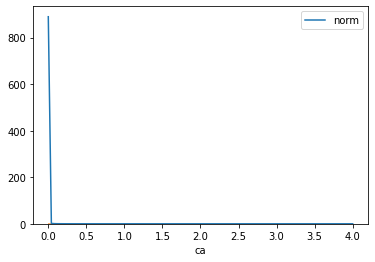

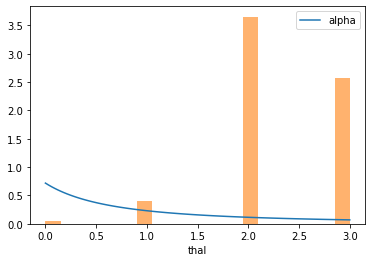

In [35]:
for feature in df.columns:
    if feature in ['target', 'sex']: # skip target and categorical features
        continue
    data = df[feature]
    # Fit distribution to data
    dist_names = ["norm", "exponweib", "weibull_max", "genextreme", "alpha", "beta", "gamma", "lognorm", "pareto"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # Make PDF with best params 
    pdf = dist.pdf(np.linspace(min(data), max(data), 100), *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(np.linspace(min(data), max(data), 100), pdf, label=best_dist)
    plt.hist(data, bins=20, density=True, alpha=0.6)
    plt.xlabel(feature)
    plt.legend(loc='best')
    plt.show()

healthy VS disease males VS females

<AxesSubplot: xlabel='target', ylabel='count'>

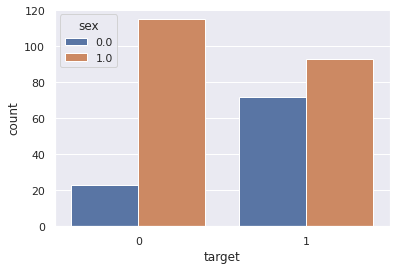

In [78]:
sns.countplot(data = df, x='target', hue = 'sex')

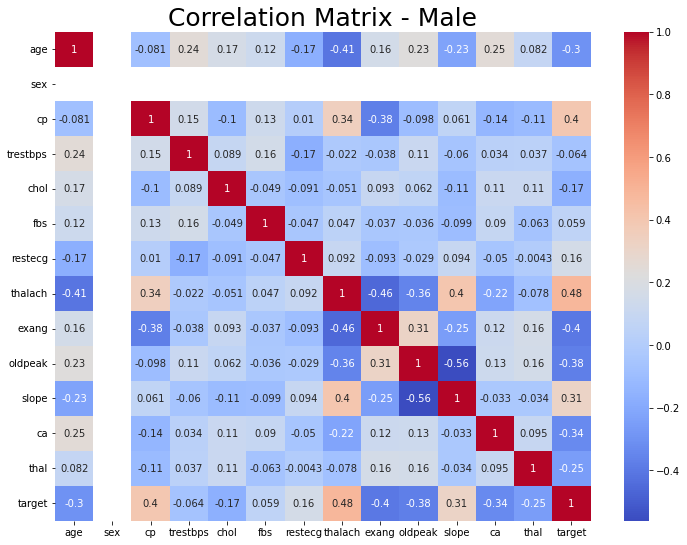

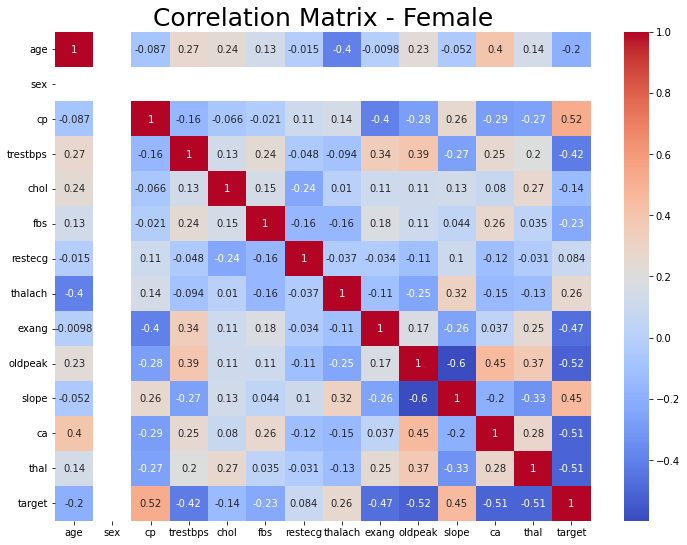

In [43]:
# Create separate DataFrames for males and females
male_df = df.loc[df['sex'] == 1]
female_df = df.loc[df['sex'] == 0]

# Create correlation matrix for males and females
male_corr_matrix = male_df.corr()
female_corr_matrix = female_df.corr()

# Visualize correlation matrix for males using heatmap
plt.figure(figsize = (12, 9))
plt.title('Correlation Matrix - Male', fontdict={'fontsize': 25})
sns.heatmap(male_corr_matrix, cmap='coolwarm',annot=True)
plt.show()

# Visualize correlation matrix for females using heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(female_corr_matrix, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix - Female', fontdict={'fontsize': 25})
plt.show()

<AxesSubplot: >

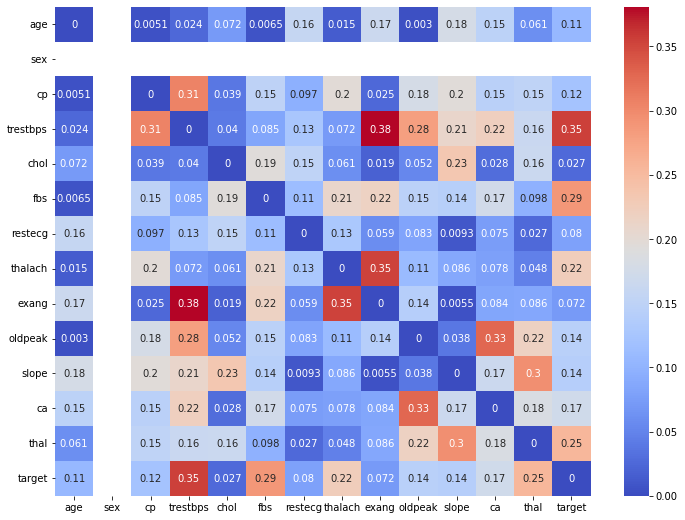

In [51]:
diff_matrix = abs(male_corr_matrix - female_corr_matrix)
plt.figure(figsize = (12, 9))
sns.heatmap(diff_matrix, cmap='coolwarm',annot=True)

/dsp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


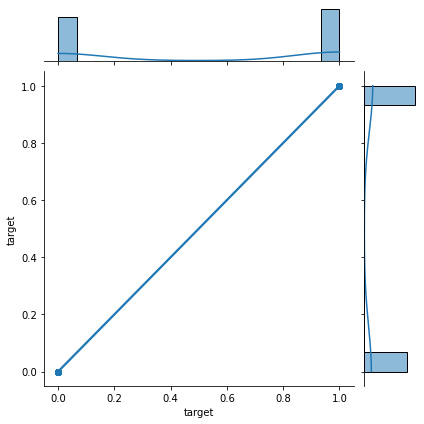

LinAlgError: singular matrix

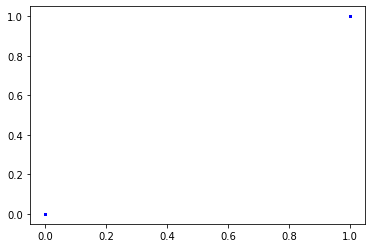

In [34]:
# renaming the target variable for easy refernce 
df.rename(columns={'num': 'target'}, inplace=True)

# Find significant correlations
corr_matrix = df.corr()
significant_correlations = corr_matrix[abs(corr_matrix["target"]) > 0.5].index

# plot the significant correlations using seaborn's joint plot
for var in significant_correlations:
    sns.jointplot(x=df[var], y=df["target"], kind='reg', marginal_kws=dict(bins=15, rug=True))
    plt.show()

# Perform Bivariate normal fit
for var in significant_correlations:
    x = df[var]
    y = df["target"]
    plt.scatter(x, y, color='b', s=3)
    mean = [np.mean(x), np.mean(y)]
    cov = np.cov(x, y)
    plot_2d_Gaussian_pdf(mean, cov)

In [33]:
def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

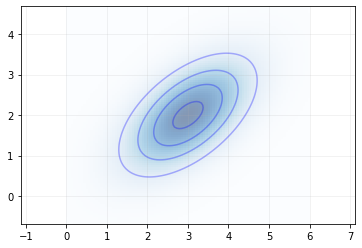

In [19]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?